In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Image Augmentation

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory(r"V:\IBM assignment\flowers\training",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"V:\IBM assignment\flowers\testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [52]:
#Create Model
model=Sequential()

In [53]:
#Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [54]:
#Maxpooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [55]:
#Flatten or input Layer
model.add(Flatten())

In [56]:
#Dense or Hidden Layer
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))

In [14]:
model.add(Dense(units=100,kernel_initializer="random_uniform",activation="relu"))

In [57]:
#Output Layer
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [58]:
#Compile The Model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
#Fit The Model

In [17]:
model.fit_generator(x_train,steps_per_epoch=135,epochs=30,validation_data=x_test,validation_steps=135)

C:\Users\MANI DUKE\AppData\Local\Temp\ipykernel_8400\1791809438.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=135,epochs=30,validation_data=x_test,validation_steps=135)


Epoch 1/30
135/135 [==============================] - 109s 790ms/step - loss: 1.3480 - accuracy: 0.3894 - val_loss: 1.1645 - val_accuracy: 0.5045
Epoch 2/30
135/135 [==============================] - 104s 771ms/step - loss: 1.1502 - accuracy: 0.5117 - val_loss: 1.1090 - val_accuracy: 0.5464
Epoch 3/30
135/135 [==============================] - 104s 769ms/step - loss: 1.0790 - accuracy: 0.5601 - val_loss: 1.0689 - val_accuracy: 0.5606
Epoch 4/30
135/135 [==============================] - 100s 743ms/step - loss: 1.0099 - accuracy: 0.5944 - val_loss: 1.1086 - val_accuracy: 0.5580
Epoch 5/30
135/135 [==============================] - 102s 756ms/step - loss: 0.9751 - accuracy: 0.6095 - val_loss: 0.9730 - val_accuracy: 0.6152
Epoch 6/30
135/135 [==============================] - 108s 800ms/step - loss: 0.9192 - accuracy: 0.6361 - val_loss: 1.0419 - val_accuracy: 0.6048
Epoch 7/30
135/135 [==============================] - 100s 741ms/step - loss: 0.8793 - accuracy: 0.6521 - val_loss: 0.8656 -

In [59]:
#Save The Model
model.save("flower.h5")

In [20]:
from tensorflow.keras.models import load_model

In [21]:
from tensorflow.keras.preprocessing import image

In [22]:
import numpy as np

In [23]:
model1=load_model("flower.h5")

In [38]:
img=image.load_img(r"V:\sunflower.jpg",target_size=(64,64))

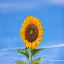

In [39]:
img

In [50]:
#Test The Model
x=image.img_to_array(img)

In [41]:
x.shape

(64, 64, 3)

In [42]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [43]:
pred=model1.predict(x)

1/1 [==============================] - 0s 125ms/step


In [48]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id=pred.argmax(axis=1)[0]

In [49]:
print("Pridicted flower is ",str(class_name[pred_id]))

Pridicted flower is  Sunflower
